<a href="https://colab.research.google.com/github/Gakori/Titanic-Machine-Learning/blob/master/Titanic_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1) Research Question

Use machine learning to create a model that predicts which passangers survived in the titanic shipwreck.
You are provided with two datasets, train.csv will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”. The test.csv  contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes.

variables include :

survival 0-No, 1-Yes

pclass ie ticket class 1,2,3

sibs - # of siblings / spouses aboard the Titanic

parch - # of parents / children aboard the Titanic

embarked - Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

## Metric for success

To determine which passengers survived in the titanic

## Understanding the context

## Recording experimental design

i) loading the data ie test and train

ii) data cleaning

iii) EDA

iv) Hypothesis testing

v) Modelling

### 2) Loading the data

In [29]:
#importations

import pandas as pd
import numpy as np

#for viz

import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [31]:
train_df = pd.read_csv('train.csv')
train_df.head()

FileNotFoundError: ignored

In [21]:
train_df.shape

NameError: ignored

*dataset contains 21263 rows and 82 columns*

In [ ]:
test_df = pd.read_csv('test.csv')
print(test_df.shape)
print(test_df.head())

*the dataset contains 418 rows and 11 columns*

In [23]:
#survived dataset

df=pd.read_csv('gender_submission.csv')
df.head()

FileNotFoundError: ignored

In [24]:
test_df.shape

(418, 11)

In [25]:
#dataset info

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [26]:
#displaying datatypes contained in the dataset

test_df.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [27]:
#stat description of the dataset

test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


*the dataset contains null values*

In [28]:
#checking for duplicates

test_df.duplicated()

duplicated_values = test_df[test_df.duplicated()]
len(duplicated_values)

0

*there are no duplicated values contained in the dataset*

### 3) Data cleaning

### 4) EDA

In [ ]:
#variables correlated to survival rate

In [ ]:
#y=age hue=survival x=gender

sns.countplot(x='Survived',data=test_df, palette='hls')

*most individuals did not survive - 0*

In [32]:
#http://bit.ly/TitanicTrainDataset

test_df = pd.read_csv('http://bit.ly/TitanicTrainDataset')
test_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
test_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


*from the above, we can observe that 38% survived, passanger ages range from 0.4 to 80*

In [34]:
#missing data

total = test_df.isnull().sum().sort_values(ascending=False)
percent_1 = test_df.isnull().sum()/test_df.isnull().count()*100

percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head()

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


*embarked has 2 missing values, age has 177 and cabin 687*

In [35]:
test_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

*the target variable is survived. we need to find variables that will contribute to the survival rate*

*everything apart from passengerid, ticket and name*

In [37]:
#age and sex

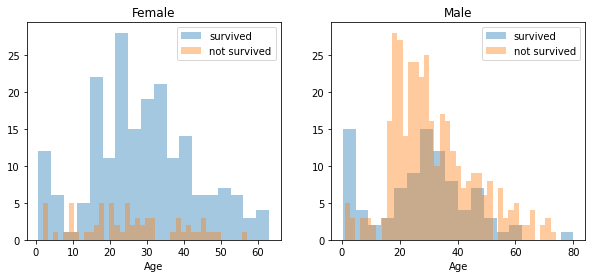

In [36]:
#instantiate survived and not survived 
survived = 'survived'
not_survived = 'not survived'

#plotting
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))

#selecting males and females from t=sex column
women = test_df[test_df['Sex']=='female']
men = test_df[test_df['Sex']=='male']

#plotting a distplot and dropping the null values
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')

ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

*for women, high survival chances are between 14 and 40 while men is 18 and 30.infants have a higher probability of survival. males have low survival at the age of 5 and 18*

In [ ]:
#embarked, pclass and sex

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


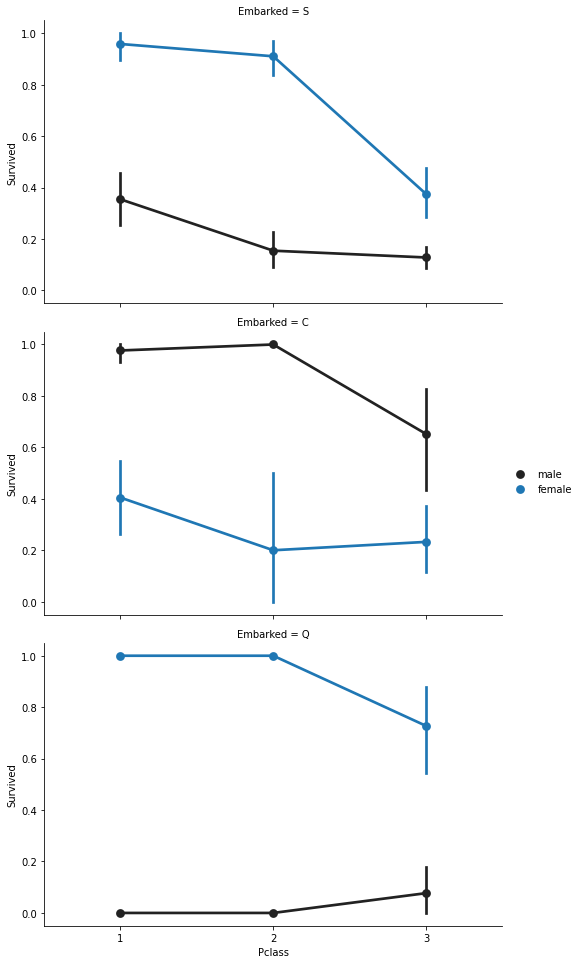

In [38]:
FacetGrid = sns.FacetGrid(test_df, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

*embarked has a correlation with survival. females have a higher chance of survival at embarked s and Q.males have a higher survival at embarked c*

In [40]:
#pclass

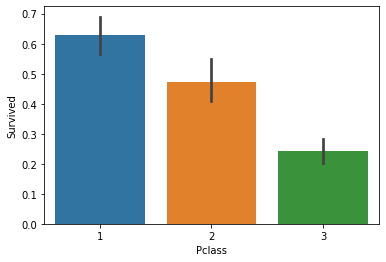

In [39]:
sns.barplot(x='Pclass', y='Survived', data=test_df)

*passangers in 1st class mostly survived compared to the other classes*

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


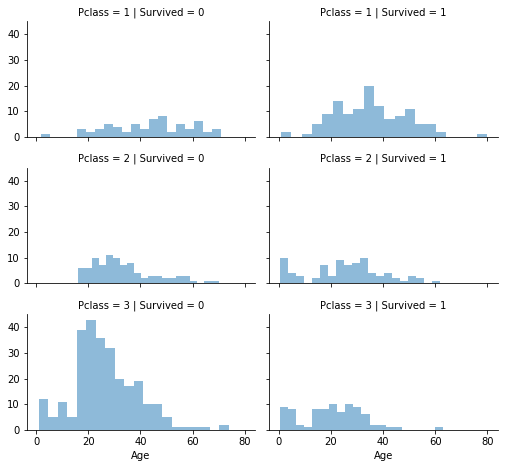

In [41]:
grid = sns.FacetGrid(test_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=0.5, bins=20)
grid.add_legend()

*this confirms our assumption, on 3rd clss, there is a high probability that passangers will not survive*

In [ ]:
#sibsp and parch

In [42]:
data=[test_df]

for dataset in data:
  dataset['relatives'] = dataset['SibSp']+dataset['Parch']
  dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
  dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
  dataset['not_alone'] = dataset['not_alone'].astype(int)

test_df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


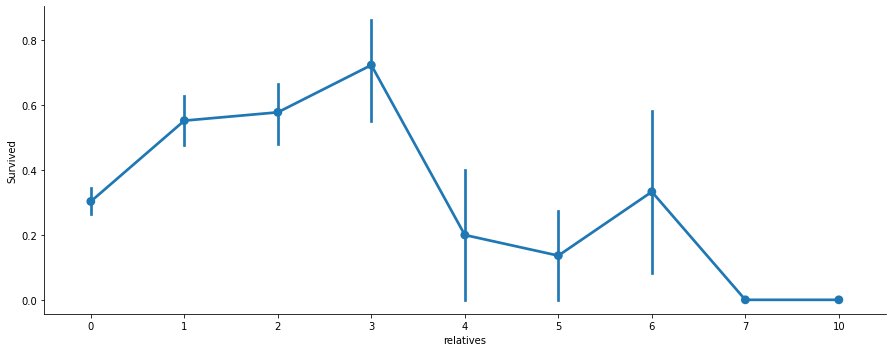

In [43]:
axes = sns.factorplot('relatives','Survived', 
                      data=test_df, aspect = 2.5, )

*high probability of survival if you have 1 to 3 relatives*

***Data preprocessing***

In [195]:
#dealing with null values,age,cabin

In [44]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [test_df]

for dataset in data:
  dataset['Cabin'] = dataset['Cabin'].fillna("U0")
  dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
  dataset['Deck'] = dataset['Deck'].map(deck)
  dataset['Deck'] = dataset['Deck'].fillna(0)
  dataset['Deck'] = dataset['Deck'].astype(int)
# we can now drop the cabin feature
test_df = test_df.drop(['Cabin'], axis=1)


In [46]:
#age

data=[test_df]

for dataset in data:
  mean = test_df['Age'].mean()
  std = test_df['Age'].std()
  is_null = dataset['Age'].isnull().sum()
  
 # compute random numbers between the mean, std and is_null
  rand_age = np.random.randint(mean-std, mean+std, size=is_null)

# fill NaN values in Age column with random values generated
  age_slice = dataset["Age"].copy()
  age_slice[np.isnan(age_slice)] = rand_age
  dataset["Age"] = age_slice
  dataset["Age"] = test_df["Age"].astype(int)
test_df["Age"].isnull().sum()

0

In [ ]:
#embarked

In [47]:
test_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [50]:
#Filling na with s
common_value = 'S'
data = [test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [51]:
#fare

for dataset in data:
  dataset['Fare'] = dataset['Fare'].fillna(0)
  dataset['Fare'] = dataset['Fare'].astype(int)

In [52]:
test_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'relatives', 'not_alone',
       'Deck'],
      dtype='object')

In [53]:
#we will use name feature to extract the titles from the name, so that we can build a new feature

data = [test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
  dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
  dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
  dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
  dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
  dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
  dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
  dataset['Title'] = dataset['Title'].fillna(0)
test_df = test_df.drop(['Name'], axis=1)

In [54]:
#sex
#convert to numeric(encode)

gender = {'male':0, 'female':1}
data = [test_df]

for dataset in data:
  dataset['Sex']= dataset['Sex'].map(gender)

In [203]:
#ticket

test_df['Ticket'].describe()

count          891
unique         681
top       CA. 2343
freq             7
Name: Ticket, dtype: object

*Since the Ticket attribute has 681 unique tickets, it will be a bit tricky to convert them into useful categories. So we will drop it from the dataset.*

In [204]:
#dropping tickets
test_df = test_df.drop(['Ticket'], axis=1)

In [207]:
#embarked
#to numeric


ports = {"S": 0, "C": 1, "Q": 2}
data = [test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

***Creating categories***

In [208]:
data = [test_df]

for dataset in data:
  dataset['Age'] = dataset['Age'].astype(int)
  dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
  dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
  dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
  dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
  dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
  dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
  dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
  dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

test_df['Age'].value_counts()

6    175
4    165
5    148
3    140
2    109
1     86
0     68
Name: Age, dtype: int64

In [209]:
test_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Title,Deck
0,1,0,3,0,2,1,0,7,0,1,0,1,8
1,2,1,1,1,5,1,0,71,1,1,0,3,3
2,3,1,3,1,3,0,0,7,0,0,1,2,8
3,4,1,1,1,5,1,0,53,0,1,0,3,3
4,5,0,3,0,5,0,0,8,0,0,1,1,8


In [210]:
for dataset in data:
  dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
  dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
  dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
  dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
  dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
  dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
  dataset['Fare'] = dataset['Fare'].astype(int)

***Creating new features***

In [212]:
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)
# Let's take a last look at the training set, before we start training the models.
test_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Title,Deck,Fare_Per_Person
0,1,0,3,0,2,1,0,0,0,1,0,1,8,0
1,2,1,1,1,5,1,0,3,1,1,0,3,3,1
2,3,1,3,1,3,0,0,0,0,0,1,2,8,0
3,4,1,1,1,5,1,0,3,0,1,0,3,3,1
4,5,0,3,0,5,0,0,1,0,0,1,1,8,1
5,6,0,3,0,1,0,0,1,2,0,1,1,8,1
6,7,0,1,0,6,0,0,3,0,0,1,1,5,3
7,8,0,3,0,0,3,1,2,0,4,0,4,8,0
8,9,1,3,1,3,0,2,1,0,2,0,3,8,0
9,10,1,2,1,1,1,0,2,1,1,0,3,8,1


### 5) Modelling

train several ML models and compare their results.

In [213]:
#y=survived
X_train = test_df.drop('Survived', axis=1)
Y_train = test_df['Survived']
X_test = test_df.drop('PassengerId', axis=1).copy()

**Stochastic Gradient  Descent(SGD)**

In [233]:
sgd=linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd=round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

61.84

**Random Forest**

In [221]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100,2)
acc_random_forest

100.0

**Logistic Regression**

In [235]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


81.59

**K Nearest Neighbor**

In [231]:
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train) 
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

80.47

**Gaussian Naive Bayes**

In [224]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred=gaussian.predict(X_test)
acc_gaussian=round(gaussian.score(X_train, Y_train) * 100,2)
acc_gaussian

78.23

**Perceptron**

In [226]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


61.84

**Linear Support Vector Machine**

In [228]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


63.86

**Decision Tree**

In [229]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

100.0

**which is the best model**

In [237]:
results = pd.DataFrame({
    'Model':['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
      'Score':[acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})

results_df = results.sort_values(by='Score', ascending=False)
results_df= results_df.set_index('Score')
results_df

,Model
Score,
100.00,Random Forest
100.00,Decision Tree
81.59,Logistic Regression
80.47,KNN
78.23,Naive Bayes
63.86,Support Vector Machines
61.84,Perceptron
61.84,Stochastic Gradient Decent


*random forest came first*

**K-Fold Cross Validation**

it randomly splits the trainig data into k subsets called folds

In [238]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring='accuracy')

print('Scores:', scores)
print('Mean:', scores.mean())
print('Standard deviation:', scores.std())

Scores: [0.81111111 0.80898876 0.74157303 0.80898876 0.84269663 0.82022472
 0.87640449 0.79775281 0.82022472 0.83146067]
Mean: 0.8159425717852684
Standard deviation: 0.032604690316472215


*average accuracy is 82% and the std is 3%.the std shows how precise the estimates are.this means that the accuracy of our model can differ +-3%*

***Random forest*** is a supervised learning algorithm.from its name, it creates forest and makes it somehow random. 

random forest builds several decison trees and merges them together to get an accurate and stable prediction

***Feature importance***

Random forest make it very easy to measure the relative importance of each feature.

In [239]:
#accessing importance of all features

importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
PassengerId,0.249
Title,0.176
Sex,0.132
Age,0.097
Pclass,0.070
Deck,0.058
Fare,0.048
relatives,0.048
Embarked,0.034


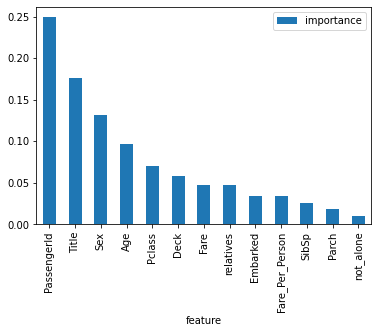

In [240]:
importances.plot.bar()

*not alone and parch do not play a significant role in our random forest classifier prediction process.this means we will drop them and train the classifier again*

In [241]:
test_df = test_df.drop('not_alone', axis=1)
test_df = test_df.drop('Parch', axis=1)

In [242]:
#training random forest agian
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

100.0 %


***out-of-bag samples***

another way to evaluate random forest classifier, which is probably more accurate, is called out-of-bag samples

In [243]:
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 82.15 %


***Hyperparameter Tuning***